# Pavli et al. Dump Cooled Engine

Comparison with data for test firing 9, from Pavli's dump-cooled engine paper.


### References:

- [1] - Pavli et al. 1966, Design and Cooling Performance of a Dump-Cooled Rocket Engine (https://ntrs.nasa.gov/citations/19660022898)

In [1]:
import bamboo as bam
import pypropep as ppp
from CoolProp.CoolProp import PropsSI
import cantera as ct
import matplotlib.pyplot as plt
import numpy as np
import json

data = json.load(open("data/pavli.json"))

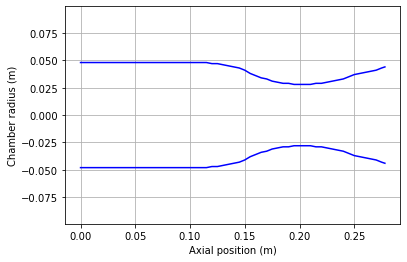

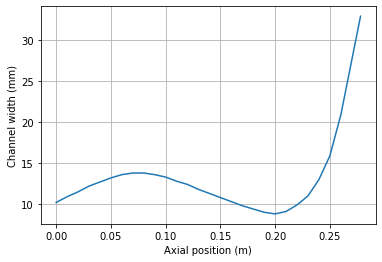

In [2]:
# Combustion chamber (firing 9) [1]
OF = 5.01
p0_chamber = 7.91e5
T0_chamber = 2939

xs = data["Chamber Contour"]["x (m)"]
ys = data["Chamber Contour"]["y (m)"]

# Cooling channels [1]
wall_thickness = 2.54e-3
wall_material = bam.materials.StainlessSteel304
number_of_channels = 8
mdot_coolant = 0.0644
p0_coolant_in = data["Coolant static pressure"]["p (Pa)"][0] # Designed for 10.3e5 Pa
T_coolant_in = data["Coolant temperature"]["T (K)"][0]       # Designed for 31.7 K
channel_height = 2.54e-3

def channel_width(x):
    return np.interp(x, data["Channel width"]["x (m)"], data["Channel width"]["w (m)"])

def blockage_ratio(x):
    area = channel_width(x) * channel_height
    return 2.045e-6 / area
    
plt.plot(xs, ys, color = 'blue')
plt.plot(xs, -np.array(ys), color = 'blue')
plt.grid()
plt.xlabel("Axial position (m)")
plt.ylabel("Chamber radius (m)")
plt.axis('equal')
plt.show()

plt.plot(xs, 1e3 * channel_width(xs))
plt.grid()
plt.xlabel("Axial position (m)")
plt.ylabel("Channel width (mm)")
plt.show()

In [3]:
# Cantera for exhaust gas
gas = ct.Solution('gri30.yaml')
gas.TPY = T0_chamber, p0_chamber, f"H2:{1}, O2:{OF}"
gas.equilibrate("TP")

cp = gas.cp
gamma = cp / gas.cv

def mu_exhaust(T, p):
    gas.TP = T, p
    return gas.viscosity

def k_exhaust(T, p):
    gas.TP = T, p
    return gas.thermal_conductivity

def Pr_exhaust(T, p):
    gas.TP = T, p
    return gas.cp * gas.viscosity / gas.thermal_conductivity

In [4]:
# CoolProp for coolant transport properties
def Pr_coolant(T, p):
    return PropsSI("PRANDTL", "T", T, "P", p, "HYDROGEN")

def mu_coolant(T, p):
    return PropsSI("VISCOSITY", "T", T, "P", p, "HYDROGEN")

def k_coolant(T, p):
    return PropsSI("CONDUCTIVITY", "T", T, "P", p, "HYDROGEN")

def cp_coolant(T, p):
    return PropsSI("CPMASS", "T", T, "P", p, "HYDROGEN") 

def rho_coolant(T, p):
    return PropsSI("DMASS", "T", T, "P", p, "HYDROGEN") 

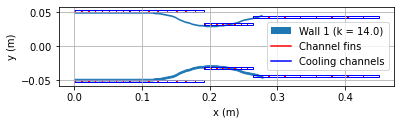

In [5]:
# Set up everything for bamboo
geometry = bam.Geometry(xs = xs, 
                        ys = ys)

perfect_gas = bam.PerfectGas(gamma = gamma, 
                             cp = cp)   

chamber_conditions = bam.ChamberConditions(p0 = p0_chamber, 
                                           T0 = T0_chamber)

exhaust_transport = bam.TransportProperties(Pr = Pr_exhaust,
                                            mu = mu_exhaust,
                                            k = k_exhaust)

coolant_transport = bam.TransportProperties(Pr = Pr_coolant,
                                            mu = mu_coolant,
                                            k = k_coolant,
                                            cp = cp_coolant,
                                            rho = rho_coolant)

cooling_jacket = bam.CoolingJacket(T_coolant_in = T_coolant_in,                           
                                   p0_coolant_in = p0_coolant_in, 
                                   coolant_transport = coolant_transport, 
                                   mdot_coolant = mdot_coolant, 
                                   configuration = "spiral", 
                                   channel_height = channel_height,
                                   channel_width = channel_width,
                                   number_of_channels = number_of_channels,
                                   blockage_ratio = blockage_ratio)

wall = bam.Wall(material = wall_material, 
                thickness = wall_thickness)

engine = bam.Engine(perfect_gas = perfect_gas, 
                    chamber_conditions = chamber_conditions, 
                    geometry = geometry,
                    cooling_jacket = cooling_jacket,
                    exhaust_transport = exhaust_transport,
                    walls = wall)

engine.plot()

In [6]:
# Run simulation
bamboo_data = engine.steady_heating_analysis(counterflow = False)

dp/dLc = 36553.13593867021 from friction and 0.015897231130150107 from momentum
dp/dLc = 36894.8582255913 from friction and 0.015928348507986766 from momentum
dp/dLc = 37233.973803545814 from friction and 0.015957261252187344 from momentum
dp/dLc = 37570.39697217741 from friction and 0.015983982767411815 from momentum
dp/dLc = 37904.15456627039 from friction and 0.01600856970804797 from momentum
dp/dLc = 38235.26100752901 from friction and 0.016031072623205987 from momentum
dp/dLc = 38563.73240931987 from friction and 0.016051541521549712 from momentum
dp/dLc = 38889.58491656645 from friction and 0.016070025259674436 from momentum
dp/dLc = 39212.8348404588 from friction and 0.016086571626779712 from momentum
dp/dLc = 39533.49859556223 from friction and 0.016101227352912615 from momentum
dp/dLc = 39851.59266450373 from friction and 0.016114038126671306 from momentum
dp/dLc = 40167.13356391506 from friction and 0.016125048612565033 from momentum
dp/dLc = 40480.13781375207 from friction a

dp/dLc = 72207.78330051605 from friction and 0.004390505518014277 from momentum
dp/dLc = 72334.25541639443 from friction and 0.004380250638523149 from momentum
dp/dLc = 72459.8375728981 from friction and 0.004369974736941596 from momentum
dp/dLc = 72584.53498337448 from friction and 0.004359678620786142 from momentum
dp/dLc = 72708.35284423514 from friction and 0.0043493630857559295 from momentum
dp/dLc = 72831.29633457537 from friction and 0.0043390289161484 from momentum
dp/dLc = 72953.37061580548 from friction and 0.004328676884738355 from momentum
dp/dLc = 73074.580831296 from friction and 0.00395651245692246 from momentum
dp/dLc = 73199.90147380636 from friction and 0.002207517563123452 from momentum
dp/dLc = 73353.96846570699 from friction and 0.002204808798906231 from momentum
dp/dLc = 73507.25266633138 from friction and 0.002202078528641509 from momentum
dp/dLc = 73659.75905400308 from friction and 0.0021993271342916104 from momentum
dp/dLc = 73811.49111242864 from friction and

dp/dLc = 118626.59073642666 from friction and 3.6144656052429998 from momentum
dp/dLc = 119081.61101294008 from friction and 3.6308128065180463 from momentum
dp/dLc = 119537.9723459736 from friction and 3.6472253455538457 from momentum
dp/dLc = 119995.68052729558 from friction and 3.6637035121297 from momentum
dp/dLc = 120454.74137999056 from friction and 3.6802475086046984 from momentum
dp/dLc = 120915.16075885782 from friction and 3.696857658507458 from momentum
dp/dLc = 121376.94455039708 from friction and 3.7135342873161443 from momentum
dp/dLc = 121840.09867303054 from friction and 3.73027772237054 from momentum
dp/dLc = 122304.62907732821 from friction and 3.747088292873351 from momentum
dp/dLc = 122770.54174623455 from friction and 3.763966329988151 from momentum
dp/dLc = 123237.84269529764 from friction and 5.372372566376038 from momentum
dp/dLc = 123740.21901190605 from friction and 10.56550707761804 from momentum
dp/dLc = 124328.1799487188 from friction and 10.629894610307389

dp/dLc = 278490.92539081397 from friction and 34.69057657587004 from momentum
dp/dLc = 279932.5103196054 from friction and 34.83201388839903 from momentum
dp/dLc = 281383.4577100068 from friction and 34.96731140819717 from momentum
dp/dLc = 282843.86391896475 from friction and 35.096599909028285 from momentum
dp/dLc = 284313.82658497896 from friction and 35.17218012187935 from momentum
dp/dLc = 285793.517313645 from friction and 35.207247307443296 from momentum
dp/dLc = 287283.09227330703 from friction and 35.23262566511702 from momentum
dp/dLc = 288782.6637892519 from friction and 35.24870774069031 from momentum
dp/dLc = 290292.34571926756 from friction and 35.25589321127634 from momentum
dp/dLc = 291812.2534734371 from friction and 35.254586898808846 from momentum
dp/dLc = 293342.5040348711 from friction and 35.245196887976995 from momentum
dp/dLc = 294883.2159813961 from friction and 35.22813275907193 from momentum
dp/dLc = 296434.50950822275 from friction and 35.203803938419284 fro

dp/dLc = 685440.8922710014 from friction and 43.502871542339236 from momentum
dp/dLc = 688185.3990238772 from friction and 44.127785147632395 from momentum
dp/dLc = 690938.5978955142 from friction and 44.73218781271869 from momentum
dp/dLc = 693698.2772600837 from friction and 45.21347916788551 from momentum
dp/dLc = 696463.6440989162 from friction and 45.58895682993755 from momentum
dp/dLc = 699245.3492016428 from friction and 45.93615421594955 from momentum
dp/dLc = 702042.9093417213 from friction and 46.25406231948972 from momentum
dp/dLc = 704856.7761644571 from friction and 46.54184125439219 from momentum
dp/dLc = 707687.3262256123 from friction and 46.7987683398513 from momentum
dp/dLc = 710534.9558653196 from friction and 47.02424974066775 from momentum
dp/dLc = 713400.0724115337 from friction and 47.21782468651395 from momentum
dp/dLc = 716283.0951053577 from friction and 47.379168870241976 from momentum
dp/dLc = 719184.4551118364 from friction and 47.59098357376775 from moment

dp/dLc = 304125.785391192 from friction and 4.268789496864825 from momentum
dp/dLc = 300271.30285779154 from friction and 4.103718490503856 from momentum
dp/dLc = 296495.17174887826 from friction and 3.945880156957481 from momentum
dp/dLc = 292795.21866673784 from friction and 3.79492004969545 from momentum
dp/dLc = 289169.34619396913 from friction and 3.650502946963262 from momentum
dp/dLc = 285615.5297015291 from friction and 3.51231170776914 from momentum
dp/dLc = 282131.8143128458 from friction and 3.380046201924959 from momentum
dp/dLc = 278716.31201531424 from friction and 3.2534223091056194 from momentum
dp/dLc = 275367.19891104696 from friction and 3.1321709820387147 from momentum
dp/dLc = 272082.7125992364 from friction and 3.016037369332768 from momentum
dp/dLc = 268861.14968296513 from friction and 2.9047799939798464 from momentum
dp/dLc = 265700.8633937308 from friction and 2.7981699835371106 from momentum
dp/dLc = 262600.26132736105 from friction and 2.6959903485939214 fro

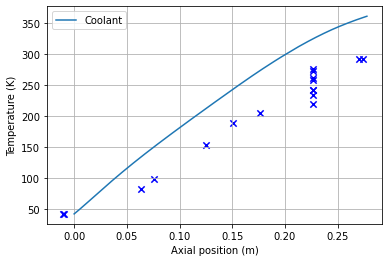

In [7]:
bam.plot.plot_temperatures(bamboo_data, only_indexes = [0])
plt.scatter(data["Coolant temperature"]["x (m)"], 
            data["Coolant temperature"]["T (K)"],
            marker = 'x',
            s = 40,
            color = 'blue')
plt.show()

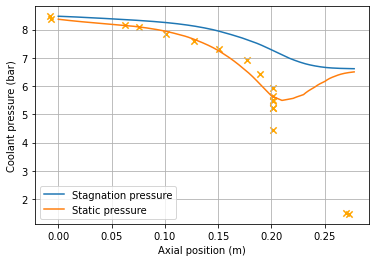

In [8]:
bam.plot.plot_jacket_pressure(bamboo_data)
plt.scatter(data["Coolant static pressure"]["x (m)"], 
            np.array(data["Coolant static pressure"]["p (Pa)"])/1e5,
            marker = 'x',
            s = 40,
            color = 'orange')
plt.show()

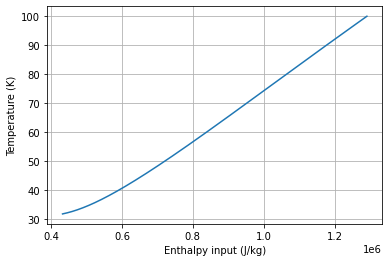

No flat line, so there was no boiling


In [9]:
# Check if the hydrogen was supposed to boil
p = 10e5
H_0 = PropsSI("HMASS", "T", 31.7, "P", p, "HYDROGEN")
H_END = PropsSI("HMASS", "T", 100, "P", p, "HYDROGEN")
H = np.linspace(H_0, H_END, 1000)
T = PropsSI("T", "HMASS", H, "P", p, "HYDROGEN")

plt.plot(H, T)
plt.grid()
plt.xlabel("Enthalpy input (J/kg)")
plt.ylabel("Temperature (K)")
plt.show()

print("No flat line, so there was no boiling")